# Import library

In [1]:
import pandas as pd
import yaml

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import container
import seaborn as sns
import glob
import json
from matplotlib.colors import LogNorm
import copy
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

from matplotlib import rc



In [2]:
from matplotlib.patches import PathPatch

def adjust_box_widths(ax, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    #for ax in g.axes:

        # iterating through axes artists:
    for c in ax.get_children():

        # searching for PathPatches
        if isinstance(c, PathPatch):
            # getting current width of box:
            p = c.get_path()
            verts = p.vertices
            verts_sub = verts[:-1]
            xmin = np.min(verts_sub[:, 0])
            xmax = np.max(verts_sub[:, 0])
            xmid = 0.5*(xmin+xmax)
            xhalf = 0.5*(xmax - xmin)

            # setting new width of box
            xmin_new = xmid-fac*xhalf
            xmax_new = xmid+fac*xhalf
            verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
            verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

            # setting new width of median line
            for l in ax.lines:
                if np.all(l.get_xdata() == [xmin, xmax]):
                    l.set_xdata([xmin_new, xmax_new])

In [3]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)
        

def latexify(fig_width=None, fig_height=None, columns=1, largeFonts=False, font_scale=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1, 2])

    if fig_width is None:
        fig_width = 3.39 if columns == 1 else 6.9  # width in inches

    if fig_height is None:
        golden_mean = (np.sqrt(5) - 1.0) / 2.0    # Aesthetic ratio
        fig_height = fig_width * golden_mean  # height in inches

    MAX_HEIGHT_INCHES = 28.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height +
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'axes.labelsize': font_scale * 10 if largeFonts else font_scale * 7,
              'axes.titlesize': font_scale * 10 if largeFonts else font_scale * 7,
              'font.size': font_scale * 10 if largeFonts else font_scale * 7,  # was 10
              'legend.fontsize': font_scale * 10 if largeFonts else font_scale * 7,  # was 10
              'xtick.labelsize': font_scale * 10 if largeFonts else font_scale * 7,
              'ytick.labelsize': font_scale * 10 if largeFonts else font_scale * 7,
              'figure.figsize': [fig_width, fig_height],
              'font.family': 'serif',
              'xtick.minor.size': 0.5,
              'xtick.major.pad': 1.5,
              'xtick.major.size': 1,
              'ytick.minor.size': 0.5,
              'ytick.major.pad': 1.5,
              'ytick.major.size': 1,
              'lines.linewidth': 1.5,
              'lines.markersize': 0.1,
              'hatch.linewidth': 0.5
              }

    matplotlib.rcParams.update(params)
    plt.rcParams.update(params)
    
    
import colorsys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def alter(alist, col, factor=1.1):
    tmp = np.array(alist)
    tmp[:,col] = tmp[:,col] * factor
    tmp[tmp > 1] = 1
    tmp[tmp < 0] = 0
    
    new = []
    for row in tmp.tolist():
        new.append(tuple(row))
        
    return new
    

def rgb2hls(alist):
    alist = alist[:]
    for i, row in enumerate(alist):
        hls = colorsys.rgb_to_hls(row[0], row[1], row[2])
        alist[i] = hls
    return alist


def hls2rgb(alist):
    alist = alist[:]
    for i, row in enumerate(alist):
        hls = colorsys.hls_to_rgb(row[0], row[1], row[2])
        alist[i] = hls
    return alist


def lighten(alist, increase=0.2):
    factor = 1 + increase
    hls = rgb2hls(alist)
    new = alter(hls, 1, factor=factor)
    rgb = hls2rgb(new)
    return rgb


def darken(alist, decrease=0.2):
    factor = 1 - decrease
    hls = rgb2hls(alist)
    new = alter(hls, 1, factor=factor)
    rgb = hls2rgb(new)
    return rgb


def saturate(alist, increase=0.2):
    factor = 1 + increase
    hls = rgb2hls(alist)
    new = alter(hls, 2, factor=factor)
    rgb = hls2rgb(new)
    return rgb
    

def desaturate(alist, decrease=0.2):
    factor = 1 - decrease
    hls = rgb2hls(alist)
    new = alter(hls, 2, factor=factor)
    rgb = hls2rgb(new)
    return rgb

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

import colorsys

def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

def scale(arr_rgb, scale_l):
    return [scale_lightness(x, scale_l) for x in arr_rgb]


In [4]:
"""Load configuration"""
with open("/home/trduong/Data/counterfactual_fairness_game_theoric/configuration.yml", 'r') as stream:
    try:
        conf = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

# Law dataset

## Evaluation

In [5]:
df_evaluate = pd.read_csv(conf['result_evaluate_law'])

In [6]:
df_evaluate

,method,RMSE,MAE,sinkhorn,energy,gaussian,laplacian,R2score
0,full_prediction,0.9616,0.7824,0.6135,0.8677,0.7192,0.5308,0.137510
1,unaware_prediction,0.9840,0.7966,0.1088,0.1970,0.1847,0.1525,0.096726
2,cf_prediction,1.0236,0.8258,0.0106,0.0393,0.0323,0.0486,0.022559
3,AL_prediction,0.9249,0.7500,0.9822,1.0324,0.6587,0.4774,0.202089
4,GL_prediction,0.9582,0.7766,0.2265,0.2517,0.1805,0.1346,0.143631
5,GD_prediction,1.0822,0.8725,0.0199,0.0405,0.0371,0.0414,-0.092469


In [7]:
# method_name = {
#     "full_prediction" : "Full model",
#     "unaware_prediction" : "Unawareness model",
#     "cf_prediction" : "Counterfactual Fairness model",
#     "inv_prediction": "Invariant model"
    
# }

In [8]:
# df['method'] = df['method'].map(method_name)

## Visualization

In [9]:
df_baseline = pd.read_csv(conf["result_law_baseline"])

In [10]:
df_ivr = pd.read_csv(conf["result_ivr_law"])

In [11]:
df_ivr

,LSAT,UGPA,sex,race,ZFYA,AL_prediction,GL_prediction,GD_prediction
0,1.123711,1.851186,1,1,2.353094,1.183158,1.167847,-0.185628
1,1.685396,-0.086709,1,1,-0.481275,0.197219,0.087433,0.519223
2,-2.246400,0.882239,1,1,-0.849093,-0.675278,-0.927551,-0.459011
3,0.000341,-0.813419,1,1,-0.968094,-0.165360,-0.011597,0.397963
4,-0.374116,1.124476,0,1,-0.686820,0.465965,0.238953,-0.263866
...,...,...,...,...,...,...,...,...
1952,1.123711,1.851186,1,1,0.524818,1.183158,1.167847,-0.185628
1953,0.000341,0.640002,1,1,0.211090,0.090816,0.315308,-0.058451
1954,-1.310258,1.366713,0,0,-2.277096,-0.816411,-0.587952,-0.389978
1955,0.374797,-0.571182,1,1,0.362545,0.250938,0.085144,0.398209


# Visualization

In [12]:
def plot_distribution(df, x_value, y_value, alpha, linewidth, ax):
    sns.kdeplot(data=df, x=x_value, hue=y_value,fill=True, 
            common_norm=False, palette=palette,alpha=alpha, linewidth=linewidth,ax=ax)


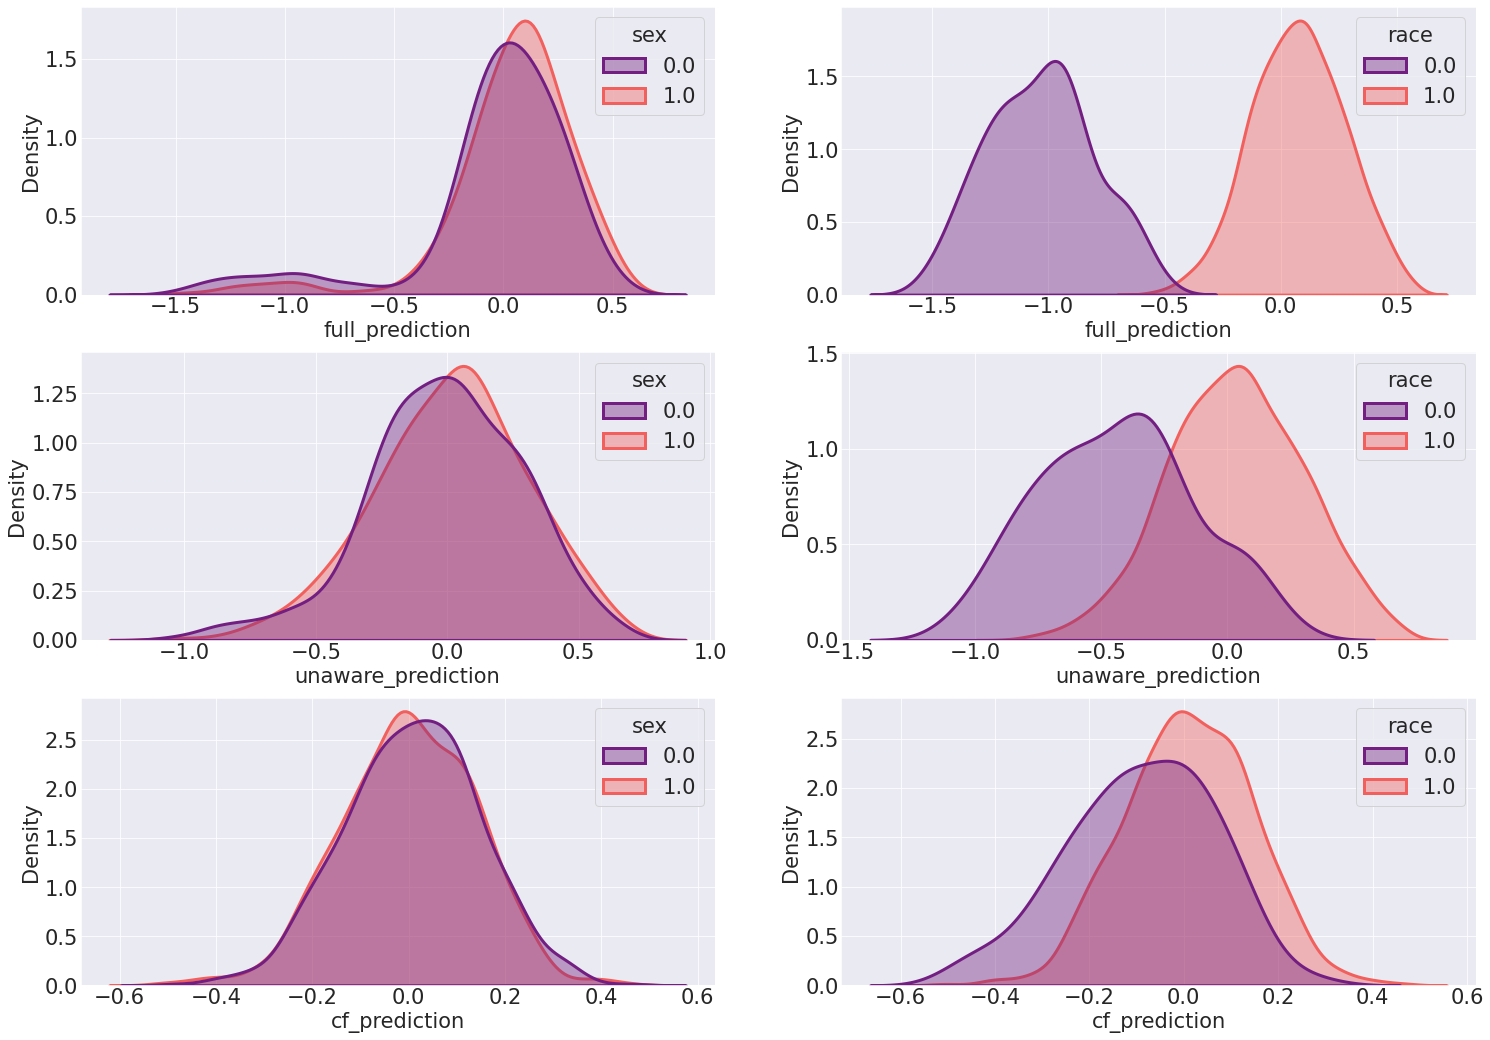

In [13]:
sns.set_context(rc={'lines.markeredgewidth': 0.1})

latexify(25,18, font_scale=3)

sns.plotting_context("poster", rc={"lines.linewidth": 40})
sns.set_style("darkgrid")

fig, axes = plt.subplots(nrows=3, ncols=2)

ax1, ax2, ax3, ax4, ax5, ax6 = axes[0,0], axes[0,1], axes[1,0], axes[1,1], axes[2,0], axes[2,1]

alpha = 0.4
linewidth = 3
palette = "magma"



axes = [ax1, ax2, ax3, ax4, ax5, ax6]

plot_distribution(df_baseline, "full_prediction", "sex", alpha, linewidth, ax1)
plot_distribution(df_baseline, "full_prediction", "race", alpha, linewidth, ax2)
plot_distribution(df_baseline, "unaware_prediction", "sex", alpha, linewidth, ax3)
plot_distribution(df_baseline, "unaware_prediction", "race", alpha, linewidth, ax4)
plot_distribution(df_baseline, "cf_prediction", "sex", alpha, linewidth, ax5)
plot_distribution(df_baseline, "cf_prediction", "race", alpha, linewidth, ax6)

In [14]:
df_baseline

,Unnamed: 0,race,sex,LSAT,UGPA,region_first,ZFYA,sander_index,first_pf,full_prediction,unaware_prediction,cf_prediction
0,5721,1.0,1.0,1.123711,1.851186,MW,2.353094,0.918452,1.0,0.440662,0.495471,0.046787
1,16803,1.0,1.0,1.685396,-0.086709,NE,-0.481275,0.879762,1.0,0.348189,0.394759,0.092997
2,20533,1.0,1.0,-2.246400,0.882239,Mt,-0.849093,0.655357,0.0,-0.241747,-0.430404,-0.209361
3,18141,1.0,1.0,0.000341,-0.813419,SC,-0.968094,0.738690,0.0,-0.016809,-0.097604,-0.059073
4,996,1.0,0.0,-0.374116,1.124476,GL,-0.686820,0.789881,1.0,0.078950,0.048006,-0.020181
...,...,...,...,...,...,...,...,...,...,...,...,...
1952,15318,1.0,1.0,1.123711,1.851186,SC,0.524818,0.918452,1.0,0.440662,0.495471,0.464080
1953,26676,1.0,1.0,0.000341,0.640002,FW,0.211090,0.795833,1.0,0.125950,0.078951,0.123664
1954,20264,0.0,0.0,-1.310258,1.366713,MS,-2.277096,0.736905,0.0,-0.811053,-0.147060,-0.215785
1955,23287,1.0,1.0,0.374797,-0.571182,GL,0.362545,0.773214,1.0,0.072233,0.021619,0.026774


In [15]:
df_ivr

,LSAT,UGPA,sex,race,ZFYA,AL_prediction,GL_prediction,GD_prediction
0,1.123711,1.851186,1,1,2.353094,1.183158,1.167847,-0.185628
1,1.685396,-0.086709,1,1,-0.481275,0.197219,0.087433,0.519223
2,-2.246400,0.882239,1,1,-0.849093,-0.675278,-0.927551,-0.459011
3,0.000341,-0.813419,1,1,-0.968094,-0.165360,-0.011597,0.397963
4,-0.374116,1.124476,0,1,-0.686820,0.465965,0.238953,-0.263866
...,...,...,...,...,...,...,...,...
1952,1.123711,1.851186,1,1,0.524818,1.183158,1.167847,-0.185628
1953,0.000341,0.640002,1,1,0.211090,0.090816,0.315308,-0.058451
1954,-1.310258,1.366713,0,0,-2.277096,-0.816411,-0.587952,-0.389978
1955,0.374797,-0.571182,1,1,0.362545,0.250938,0.085144,0.398209


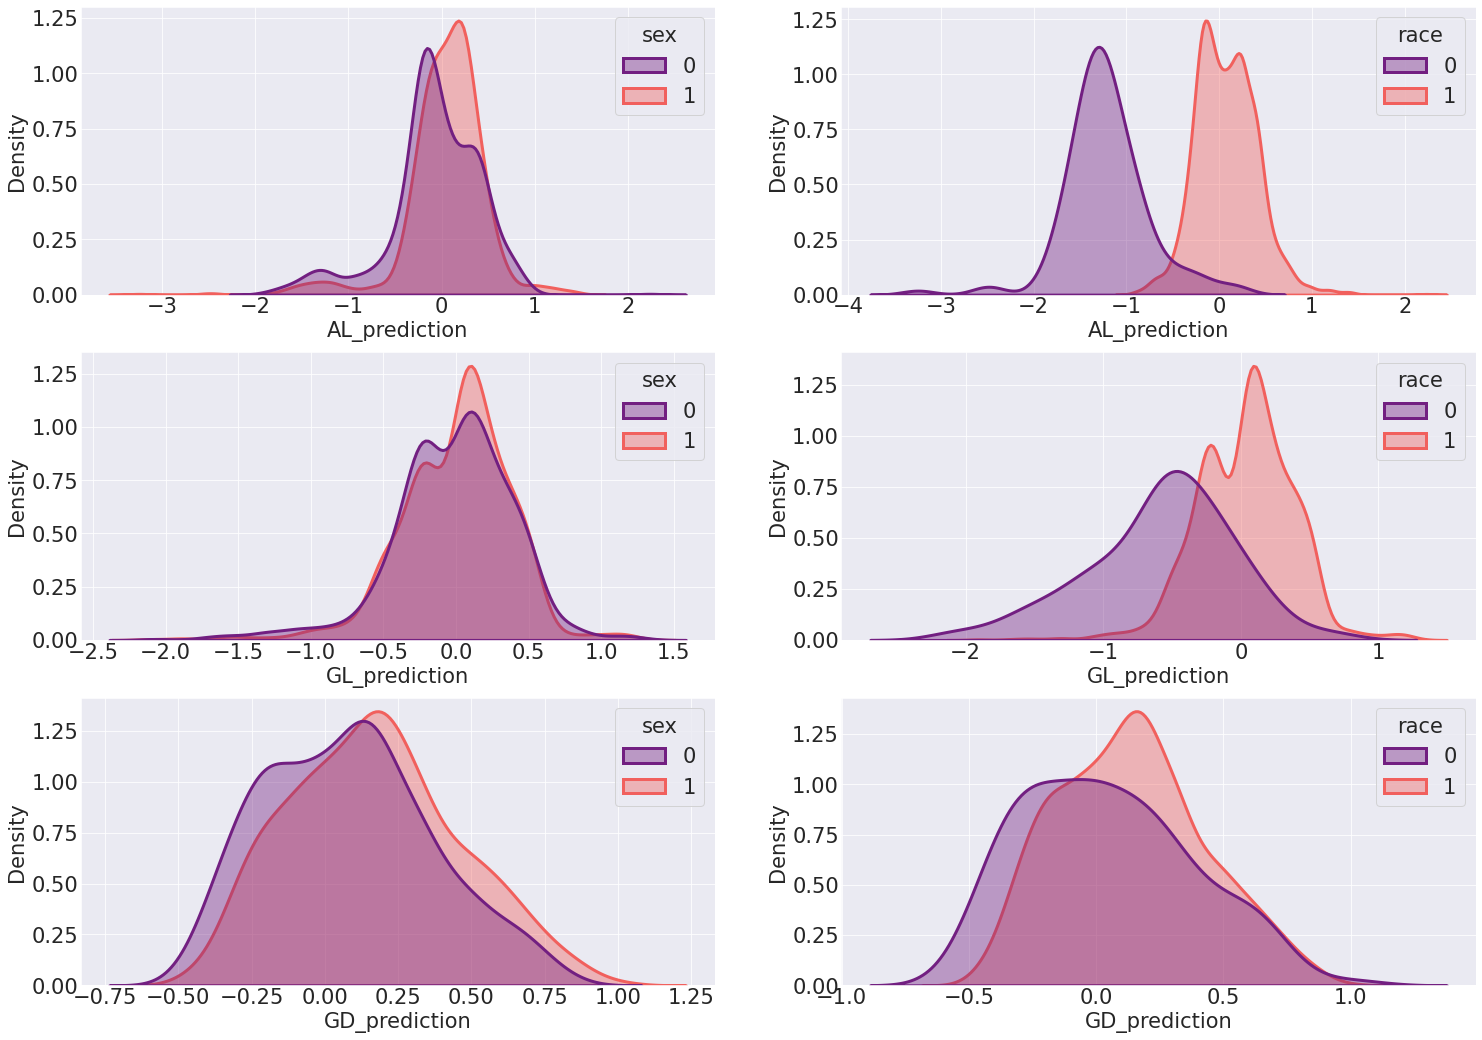

In [21]:
latexify(25,18, font_scale=3)
sns.set_context(rc={'lines.markeredgewidth': 0.1})
sns.plotting_context("poster", rc={"lines.linewidth": 40})
sns.set_style("darkgrid")

fig, axes = plt.subplots(nrows=3, ncols=2)
ax1, ax2, ax3, ax4, ax5, ax6 = axes[0,0], axes[0,1], axes[1,0], axes[1,1], axes[2,0], axes[2,1]

alpha = 0.4
linewidth = 3
palette = "magma"

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

plot_distribution(df_ivr, "AL_prediction", "sex", alpha, linewidth, ax1)
plot_distribution(df_ivr, "AL_prediction", "race", alpha, linewidth, ax2)
plot_distribution(df_ivr, "GL_prediction", "sex", alpha, linewidth, ax3)
plot_distribution(df_ivr, "GL_prediction", "race", alpha, linewidth, ax4)
plot_distribution(df_ivr, "GD_prediction", "sex", alpha, linewidth, ax5)
plot_distribution(df_ivr, "GD_prediction", "race", alpha, linewidth, ax6)

In [17]:
from geomloss import SamplesLoss
import torch 
backend = "auto"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
df_ivr.head()

,LSAT,UGPA,sex,race,ZFYA,AL_prediction,GL_prediction,GD_prediction
0,1.123711,1.851186,1,1,2.353094,1.183158,1.167847,-0.185628
1,1.685396,-0.086709,1,1,-0.481275,0.197219,0.087433,0.519223
2,-2.246400,0.882239,1,1,-0.849093,-0.675278,-0.927551,-0.459011
3,0.000341,-0.813419,1,1,-0.968094,-0.165360,-0.011597,0.397963
4,-0.374116,1.124476,0,1,-0.686820,0.465965,0.238953,-0.263866


In [19]:
R1_ivr = df_ivr[df_ivr['race'] == 1]
R0_ivr = df_ivr[df_ivr['race'] == 0]

R1_baseline = df_baseline[df_baseline['race'] == 1]
R0_baseline = df_baseline[df_baseline['race'] == 0]

In [20]:
ys = R1_ivr["GD_prediction"].values
ys_hat = R0_ivr["GD_prediction"].values

ys = torch.Tensor(ys).to(device).reshape(-1,1)
ys_hat = torch.Tensor(ys_hat).to(device).reshape(-1,1)

Loss = SamplesLoss("sinkhorn", p=2, blur=0.05, scaling=0.95, backend = backend)
print(Loss(ys, ys_hat).cpu().detach().numpy()) 
 
    
ys = R1_baseline["cf_prediction"].values
ys_hat = R0_baseline["cf_prediction"].values

ys = torch.Tensor(ys).to(device).reshape(-1,1)
ys_hat = torch.Tensor(ys_hat).to(device).reshape(-1,1)

Loss = SamplesLoss("sinkhorn", p=2, blur=0.05, scaling=0.95, backend = backend)
print(Loss(ys, ys_hat).cpu().detach().numpy())

0.005415137
0.0054288907
